### 確率ロボティクス 課題
林原研究室  
B4 16C1069 島田滉己

In [9]:
class Agent:
    def __init__(self):
        self.actions = ["↑","↓","←","→","↗","↘","↙","↖"]
        self.pos = (0,0)
agent = Agent()

### 環境の定義


In [10]:
size = 4

class State:
    def __init__(self,actions):
        self.Q = {}
        for a in actions:
            self.Q[a] = 0.0
        self.best_action = "↑"
        self.goal = False
        
    def set_goal(self,actions):
        for a in actions:
            self.Q[a] = 0.0
        self.goal = True

    def generate_hole(self, actions):
        for a in actions:
            self.Q[a] = 10000
        
states = [[State(agent.actions) for i in range(size)] for j in range(size)]
states[2][2].set_goal(agent.actions)
states[1][1].generate_hole(agent.actions)

### 描画

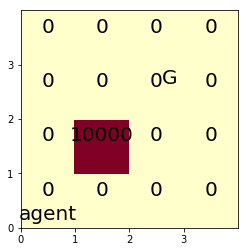

In [11]:
import matplotlib.pyplot as plt  
import matplotlib.patches as patches

def draw(mark_pos):
    fig, ax = plt.subplots()
    values = [[states[i][j].Q[states[i][j].best_action] for j in range(size)] for i in range(size)]
    mp = ax.pcolor(values, cmap=plt.cm.YlOrRd,vmin=0,vmax=8)
    ax.set_aspect(1)
    ax.set_xticks(range(size), minor=False)
    ax.set_yticks(range(size), minor=False)
    
    for x in range(len(values)):
        for y in range(len(values[0])):
            s = states[x][y]
            plt.text(x+0.5,y+0.7,int(s.Q[s.best_action]),ha = 'center', va = 'center', size=20)
            if states[x][y].goal:
                plt.text(x+0.75,y+0.75,"G",ha = 'center', va = 'center', size=20)
                
    plt.text(agent.pos[0]+0.5,agent.pos[1]+0.25,"agent",ha = 'center', va = 'center', size=20)
    
    if mark_pos == "all":   # 指定した位置にactionの文字列を書くという処理
        for x in range(size):
            for y in range(size):
                if states[x][y].goal: continue
                plt.text(x+0.5,y+0.25,states[x][y].best_action,ha = 'center', va = 'center', size=20)
    elif mark_pos != None: 
        s = states[mark_pos[0]][mark_pos[1]]
        plt.text(mark_pos[0]+0.5,mark_pos[1]+0.25,s.best_action,ha = 'center', va = 'center', size=20)
            
    plt.show()
    fig.clear()
    
draw(None)

### 状態遷移の実装

In [12]:
import random

def state_transition(s_pos,a):
    ###確率10%で元のまま ###
    if random.uniform(0,1) < 0.1:
        return s_pos

    dict = {'↑':[0, 1],  \
            '↓':[0, -1], \
            '←':[-1, 0], \
            '→':[1, 0],  \
            '↗':[1, 1],  \
            '↘':[1, -1], \
            '↙':[-1, -1],\
            '↖':[-1, 1]  \
           }

    x,y = s_pos
    x += dict[a][0]
    y += dict[a][1]

    if (x < 0 or y < 0 or x >= size or y >= size):
        x -= dict[a][0]
        y -= dict[a][1]

    return (x,y)

### 方策（$\epsilon$-greedy)

In [13]:
def e_greedy(s):
    if random.uniform(0,1) < 0.1: #10%でランダムに
        return random.choice(agent.actions)
    else:
        best_a = None
        best_q = 1000000000
        for a in s.Q:
            if best_q > s.Q[a]:
                best_q = s.Q[a]
                best_a = a
        s.best_action = best_a
        return best_a

### 1ステップの処理

In [14]:
alpha = 0.5
gamma = 1.0

def sarsa(s_pos,a):
    s = states[s_pos[0]][s_pos[1]]
    s_next_pos = state_transition(s_pos,a)
    s_next = states[s_next_pos[0]][s_next_pos[1]]
    a_next = e_greedy(s_next)
    
    q = (1.0-alpha)*s.Q[a] + alpha * (1.0 + gamma * s_next.Q[a_next])
    print("s:" + str(s_pos)+ "　a:" + a + " s':" + str(s_next_pos) + " a':" + a_next)
    print("----")
    return s_next_pos, a_next, q

def one_trial():
    agent.pos = (random.randrange(size),random.randrange(size))
    a = e_greedy(states[agent.pos[0]][agent.pos[1]])
    if states[agent.pos[0]][agent.pos[1]].goal:
        return
          
    while True:
        #draw(None)
        s_next, a_next, q = sarsa(agent.pos,a)
        states[agent.pos[0]][agent.pos[1]].Q[a] = q
        agent.pos = s_next
        a = a_next
        if states[agent.pos[0]][agent.pos[1]].goal:
            break

### 実行

s:(0, 0)　a:↑ s':(0, 1) a':↑
----
s:(0, 1)　a:↑ s':(0, 2) a':↑
----
s:(0, 2)　a:↑ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':↓
----
s:(0, 3)　a:↓ s':(0, 2) a':↓
----
s:(0, 2)　a:↓ s':(0, 1) a':↓
----
s:(0, 1)　a:↓ s':(0, 0) a':↓
----
s:(0, 0)　a:↓ s':(0, 0) a':↓
----
s:(0, 0)　a:↓ s':(0, 0) a':←
----
s:(0, 0)　a:← s':(0, 0) a':←
----
s:(0, 0)　a:← s':(0, 0) a':→
----
s:(0, 0)　a:→ s':(0, 0) a':→
----
s:(0, 0)　a:→ s':(1, 0) a':↑
----
s:(1, 0)　a:↑ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↑
----
s:(1, 3)　a:↑ s':(1, 3) a':↑
----
s:(1, 3)　a:↑ s':(1, 3) a':↓
----
s:(1, 3)　a:↓ s':(1, 2) a':↓
----
s:(1, 2)　a:↓ s':(1, 2) a':↓
----
s:(1, 2)　a:↓ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':←
----
s:(1, 2)　a:← s':(1, 2) a':←
----
s:(1, 2)　a:← s':(0, 2) a':←
----
s:(0, 2)　a:← s':(0, 2) a':←
----
s:(0, 2)　a:← s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


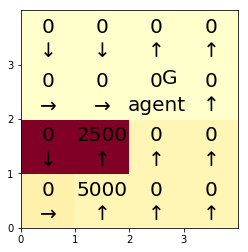

s:(2, 0)　a:↓ s':(2, 0) a':↑
----
s:(2, 0)　a:↑ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 0)　a:↗ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':↗
----
s:(1, 2)　a:↗ s':(2, 3) a':↑
----
s:(2, 3)　a:↑ s':(2, 3) a':→
----
s:(2, 3)　a:→ s':(3, 3) a':↑
----
s:(3, 3)　a:↑ s':(3, 3) a':↑
----
s:(3, 3)　a:↑ s':(3, 3) a':↓
----
s:(3, 3)　a:↓ s':(3, 2) a':↗
----
s:(3, 2)　a:↗ s':(3, 2) a':↑
----
s:(3, 2)　a:↑ s':(3, 3) a':←
----
s:(3, 3)　a:← s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(2, 1)　a:↓ s':(2, 0) a':←
----
s:(2, 0)　a:← s':(1, 0) a':↓
----
s:(1, 0)　a:↓ s':(1, 0) a':↓
----
s:(1, 0)　a:↓ s':(1, 0) a':←
----
s:(1, 0)　a:← s':(0, 0) a':↘
----
s:(0, 0)　a:↘ s':(0, 0) a':↘
----
s:(0, 0)　a:↘ s':(0, 0) a':↙
----
s:(0, 0)　a:↙ s':(0, 0) a':→
----
s:(0, 0)　a:→ s':(1, 0) a':→
----
s:(1, 0)　a:→ s':(2, 0) a':→
----
s:(2, 0)　a:→ s':(3, 0) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↑
----
s:(3, 1)　a:↑ s':(3, 2) a':→
----
s:(3, 2)　a:→ s':(3, 2) a':↓
----
s:(3, 2)　a

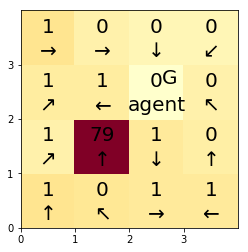

s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':↗
----
s:(1, 2)　a:↗ s':(2, 3) a':←
----
s:(2, 3)　a:← s':(1, 3) a':↗
----
s:(1, 3)　a:↗ s':(1, 3) a':↗
----
s:(1, 3)　a:↗ s':(1, 3) a':→
----
s:(1, 3)　a:→ s':(2, 3) a':→
----
s:(2, 3)　a:→ s':(3, 3) a':↖
----
s:(3, 3)　a:↖ s':(3, 3) a':↖
----
s:(3, 3)　a:↖ s':(3, 3) a':↖
----
s:(3, 3)　a:↖ s':(3, 3) a':↓
----
s:(3, 3)　a:↓ s':(3, 2) a':↑
----
s:(3, 2)　a:↑ s':(3, 2) a':↑
----
s:(3, 2)　a:↑ s':(3, 3) a':←
----
s:(3, 3)　a:← s':(2, 3) a':↘
----
s:(2, 3)　a:↘ s':(3, 2) a':↗
----
s:(3, 2)　a:↗ s':(3, 2) a':↗
----
s:(3, 2)　a:↗ s':(3, 2) a':↖
----
s:(3, 2)　a:↖ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(3, 2)　a:↓ s':(3, 1) a':↓
----
s:(3, 1)　a:↓ s':(3, 0) a':↖
----
s:(3, 0)　a:↖ s':(3, 0) a':↖
----
s:(3, 0)　a:↖ s':(2, 1) a':→
----
s:(2, 1)　a:→ s':(3, 1) a':←
----
s:(3, 1)　a:← s':(2, 1) a':↗
----
s:(2, 1)　a:↗ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 1)　a:↘ s':(1, 0) a':↓
----
s:(1, 0)　a:↓ s':(1, 0) a':↓
----
s:(1, 0)　a

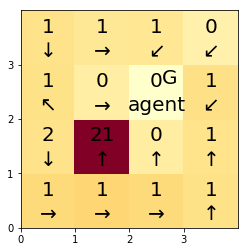

s:(0, 0)　a:↘ s':(0, 0) a':↙
----
s:(0, 0)　a:↙ s':(0, 0) a':↙
----
s:(0, 0)　a:↙ s':(0, 0) a':↖
----
s:(0, 0)　a:↖ s':(0, 0) a':↖
----
s:(0, 0)　a:↖ s':(0, 0) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 0)　a:↖ s':(0, 1) a':↘
----
s:(0, 1)　a:↘ s':(1, 0) a':↗
----
s:(1, 0)　a:↗ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(1, 2) a':↖
----
s:(1, 2)　a:↖ s':(0, 3) a':↖
----
s:(0, 3)　a:↖ s':(0, 3) a':↖
----
s:(0, 3)　a:↖ s':(0, 3) a':↙
----
s:(0, 3)　a:↙ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':→
----
s:(0, 3)　a:→ s':(1, 3) a':↓
----
s:(1, 3)　a:↓ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':←
----
s:(1, 3)　a:← s':(0, 3) a':↘
----
s:(0, 3)　a:↘ s':(1, 2) a':↖
----
s:(1, 2)　a:↖ s':(0, 3) a':←
----
s:(0, 3)　a:← s':(0, 3) a':←
----
s:(0, 3)　a:← s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↗
----
s:(0, 3)　a

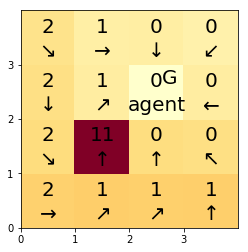

s:(1, 3)　a:↑ s':(1, 3) a':↑
----
s:(1, 3)　a:↑ s':(1, 3) a':↗
----
s:(1, 3)　a:↗ s':(1, 3) a':↗
----
s:(1, 3)　a:↗ s':(1, 3) a':→
----
s:(1, 3)　a:→ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 2)　a:↘ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':←
----
s:(1, 2)　a:← s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↖
----
s:(0, 3)　a:↓ s':(0, 2) a':↗
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↙
----
s:(0, 2)　a:↖ s':(0, 2) a':↑
----
s:(0, 2)　a:↑ s':(0, 3) a':←
----
s:(0, 3)　a:← s':(0, 3) a':←
----
s:(0, 3)　a:← s':(0, 3) a':↘
----
s:(0, 3)　a:↘ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a

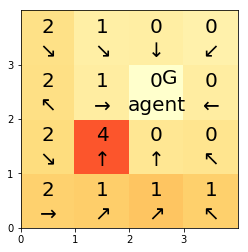

s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 3)　a:↗ s':(3, 3) a':↗
----
s:(3, 3)　a:↗ s':(3, 3) a':↙
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(0, 0)　a:→ s':(1, 0) a':←
----
s:(1, 0)　a:← s':(1, 0) a':←
----
s:(1, 0)　a:← s':(0, 0) a':↓
----
s:(0, 0)　a:↓ s':(0, 0) a':↓
----
s:(0, 0)　a:↓ s':(0, 0) a':↗
----
s:(0, 0)　a:↗ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 2)　a:↙ s':(0, 2) a':↙
----
s:(0, 2)　a:↙ s':(0, 2) a':↓
----
s:(0, 2)　a:↓ s':(0, 1) a':↓
----
s:(0, 1)　a:↓ s':(0, 0) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↖
----
s:(0, 1)　a:↖ s':(0, 1) a':↖
----
s:(0, 1)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(2, 0)　a:↑ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(2, 0)　a:← s':(1, 0) a':↑
----
s:(1, 0)　a:↑ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':↘
----
s:(1, 2)　a

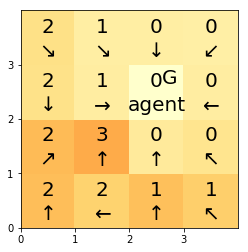

s:(1, 0)　a:→ s':(2, 0) a':↓
----
s:(2, 0)　a:↓ s':(2, 0) a':↘
----
s:(2, 0)　a:↘ s':(2, 0) a':↘
----
s:(2, 0)　a:↘ s':(2, 0) a':↑
----
s:(2, 0)　a:↑ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(3, 0)　a:← s':(2, 0) a':→
----
s:(2, 0)　a:→ s':(2, 0) a':→
----
s:(2, 0)　a:→ s':(3, 0) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 3)　a:↑ s':(3, 3) a':↑
----
s:(3, 3)　a:↑ s':(3, 3) a':→
----
s:(3, 3)　a:→ s':(3, 3) a':↘
----
s:(3, 3)　a:↘ s':(3, 3) a':↙
----
s:(3, 3)　a:↙ s':(3, 3) a':↙
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 0)　a:↗ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 3)　a:↘ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 0)　a:↗ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↗
----
s:(0, 2)　a:← s':(0, 2) a':←
----
s:(0, 2)　a:← s':(0, 2) a':↗
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a

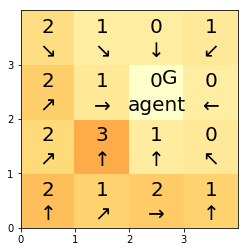

s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 0)　a:↓ s':(3, 0) a':↓
----
s:(3, 0)　a:↓ s':(3, 0) a':↗
----
s:(3, 0)　a:↗ s':(3, 0) a':↗
----
s:(3, 0)　a:↗ s':(3, 0) a':↘
----
s:(3, 0)　a:↘ s':(3, 0) a':↘
----
s:(3, 0)　a:↘ s':(3, 0) a':↖
----
s:(3, 0)　a:↖ s':(2, 1) a':↓
----
s:(2, 1)　a:↓ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 0)　a:← s':(0, 0) a':←
----
s:(0, 0)　a:← s':(0, 0) a':→
----
s:(0, 0)　a:→ s':(1, 0) a':↗
----
s:(1, 0)　a:↗ s':(1, 0) a':↗
----
s:(1, 0)　a:↗ s':(2, 1) a':→
----
s:(2, 1)　a:→ s':(2, 1) a':→
----
s:(2, 1)　a:→ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 0)　a:↘ s':(0, 0) a':↘
----
s:(0, 0)　a:↘ s':(0, 0) a':↙
----
s:(0, 0)　a:↙ s':(0, 0) a':↙
----
s:(0, 0)　a:↙ s':(0, 0) a':↖
----
s:(0, 0)　a:↖ s':(0, 0) a':↖
----
s:(0, 0)　a:↖ s':(0, 0) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a

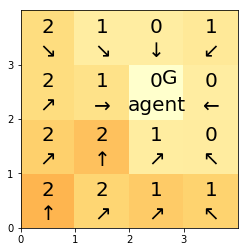

s:(3, 3)　a:↓ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(3, 0)　a:→ s':(3, 0) a':→
----
s:(3, 0)　a:→ s':(3, 0) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 2)　a:↖ s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↘
----


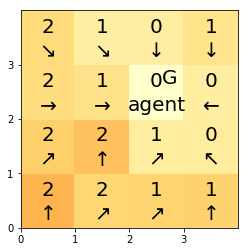

s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 2)　a:→ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↙
----
s:(3, 2)　a:↓ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 0)　a:→ s':(2, 0) a':↙
----
s:(2, 0)　a:↙ s':(2, 0) a':↙
----
s:(2, 0)　a:↙ s':(2, 0) a':↑
----
s:(2, 0)　a:↑ s':(2, 1) a':↙
----
s:(2, 1)　a:↙ s':(2, 1) a':↙
----
s:(2, 1)　a:↙ s':(1, 0) a':↗
----
s:(1, 0)　a:↗ s':(2, 1) a':↖
----
s:(2, 1)　a:↖ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 1)　a:← s':(0, 1) a':←
----
s:(0, 1)　a:← s':(0, 1) a':↑
----
s:(0, 1)　a:↑ s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


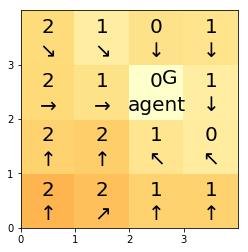

s:(0, 1)　a:↘ s':(1, 0) a':↗
----
s:(1, 0)　a:↗ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 0)　a:→ s':(0, 0) a':→
----
s:(0, 0)　a:→ s':(1, 0) a':↗
----
s:(1, 0)　a:↗ s':(2, 1) a':↖
----
s:(2, 1)　a:↖ s':(1, 2) a':↓
----
s:(1, 2)　a:↓ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 1)　a:↓ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↙
----
s:(0, 3)　a:↘ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(2, 3)　a:↗ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----


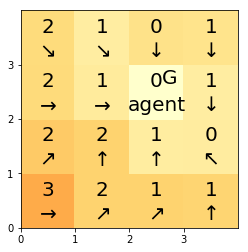

s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 0)　a:↘ s':(1, 0) a':↘
----
s:(1, 0)　a:↘ s':(1, 0) a':↓
----
s:(1, 0)　a:↓ s':(1, 0) a':↓
----
s:(1, 0)　a:↓ s':(1, 0) a':↙
----
s:(1, 0)　a:↙ s':(1, 0) a':↙
----
s:(1, 0)　a:↙ s':(1, 0) a':→
----
s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 3)　a:↘ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↙
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':←
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 0)　a:↓ s':(2, 0) a':↓
----
s:(2, 0)　a:↓ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----


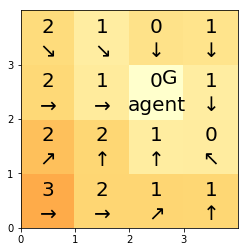

s:(2, 1)　a:↙ s':(1, 0) a':↗
----
s:(1, 0)　a:↗ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 2)　a:↖ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 0)　a:↗ s':(1, 0) a':↗
----
s:(1, 0)　a:↗ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 0)　a:↗ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----


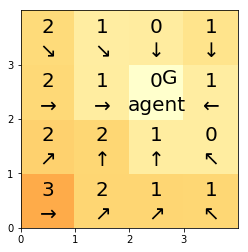

s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(2, 0)　a:↑ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 0)　a:↗ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 3)　a:↘ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↖
----
s:(0, 1)　a:← s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 0)　a:↙ s':(0, 0) a':↑
----
s:(0, 0)　a:↑ s':(0, 0) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':↘
----
s:(1, 2)　a:↘ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↗
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----


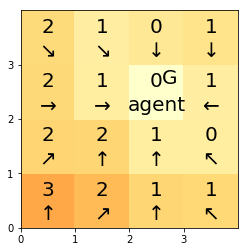

s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 2)　a:→ s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 2)　a:↑ s':(3, 3) a':←
----
s:(3, 3)　a:← s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----


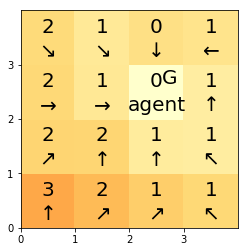

s:(1, 1)　a:↑ s':(1, 2) a':↘
----
s:(1, 2)　a:↘ s':(2, 1) a':↘
----
s:(2, 1)　a:↘ s':(2, 1) a':↘
----
s:(2, 1)　a:↘ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↖
----
s:(0, 2)　a:→ s':(1, 2) a':↗
----
s:(1, 2)　a:↗ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(3, 3)　a:↗ s':(3, 3) a':↙
----
s:(3, 3)　a:↙ s':(3, 3) a':↙
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(1, 0)　a:↗ s':(2, 1) a':↗
----
s:(2, 1)　a:↗ s':(3, 2) a':↗
----
s:(3, 2)　a:↗ s':(3, 2) a':↗
----
s:(3, 2)　a:↗ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 1)　a:↙ s':(0, 1) a':↙
----
s:(0, 1)　a:↙ s':(0, 1) a':↑
----
s:(0, 1)　a:↑ s':(0, 2) a':←
----
s:(0, 2)　a:← s':(0, 2) a':↗
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(3, 1)　a:↓ s':(3, 0) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':←
----
s:(3, 1)　a:← s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a

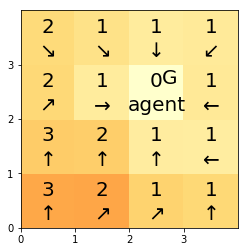

s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 1)　a:↓ s':(0, 0) a':←
----
s:(0, 0)　a:← s':(0, 0) a':←
----
s:(0, 0)　a:← s':(0, 0) a':→
----
s:(0, 0)　a:→ s':(1, 0) a':↗
----
s:(1, 0)　a:↗ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 3)　a:↘ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 2)　a:↗ s':(1, 3) a':↖
----
s:(1, 3)　a:↖ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 3)　a:↘ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:↑ s':(2, 3) a':↑
----
s:(2, 3)　a:↑ s':(2, 3) a':←
----
s:(2, 3)　a:← s':(1, 3) a':↙
----
s:(1, 3)　a:↙ s':(0, 2) a':↗
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 0)　a:↘ s':(0, 0) a':↘
----
s:(0, 0)　a:↘ s':(0, 0) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↘
----
s:(0, 1)　a:↘ s':(1, 0) a':↗
----
s:(1, 0)　a:↗ s':(1, 0) a':↗
----
s:(1, 0)　a

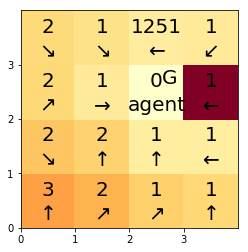

s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(2, 0)　a:↑ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 1)　a:↙ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↘
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(2, 3)　a:→ s':(3, 3) a':↙
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----


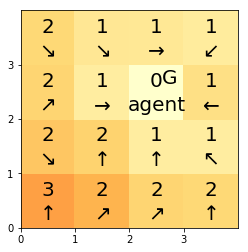

s:(1, 0)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 0)　a:↙ s':(1, 0) a':↗
----
s:(1, 0)　a:↗ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↘
----
s:(2, 0)　a:↑ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 0)　a:← s':(1, 0) a':↗
----
s:(1, 0)　a:↗ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 3)　a:↘ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↘
----


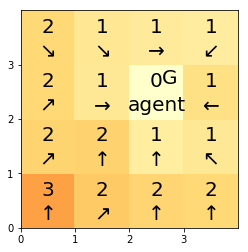

s:(0, 3)　a:↘ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':←
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(2, 3)　a:↖ s':(2, 3) a':↖
----
s:(2, 3)　a:↖ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 3)　a:↘ s':(1, 2) a':↘
----
s:(1, 2)　a:↘ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 1)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 0)　a:↗ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----


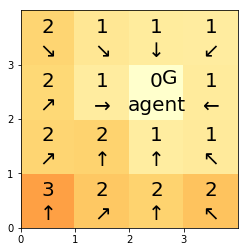

s:(1, 0)　a:↗ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 2)　a:↖ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----


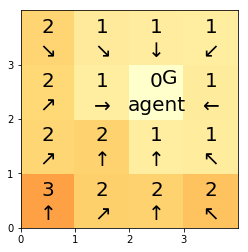

s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(2, 0)　a:↑ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 1)　a:↑ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


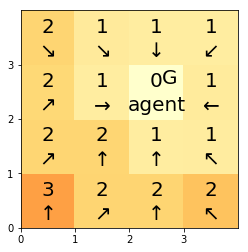

s:(0, 1)　a:↗ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 0)　a:↙ s':(3, 0) a':↙
----
s:(3, 0)　a:↙ s':(3, 0) a':←
----
s:(3, 0)　a:← s':(2, 0) a':↘
----
s:(2, 0)　a:↘ s':(2, 0) a':↑
----
s:(2, 0)　a:↑ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(2, 0)　a:↑ s':(2, 0) a':←
----
s:(2, 0)　a:← s':(1, 0) a':↗
----
s:(1, 0)　a:↗ s':(2, 1) a':←
----
s:(2, 1)　a:← s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↙
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----


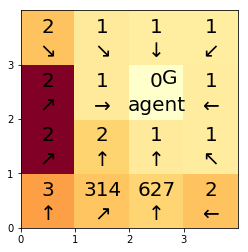

s:(3, 0)　a:↑ s':(3, 1) a':↑
----
s:(3, 1)　a:↑ s':(3, 2) a':↓
----
s:(3, 2)　a:↓ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(2, 0)　a:→ s':(3, 0) a':↖
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 1)　a:↙ s':(0, 0) a':→
----
s:(0, 0)　a:→ s':(1, 0) a':←
----
s:(1, 0)　a:← s':(0, 0) a':↖
----
s:(0, 0)　a:↖ s':(0, 0) a':↖
----
s:(0, 0)　a:↖ s':(0, 0) a':→
----
s:(0, 0)　a:→ s':(1, 0) a':→
----
s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----


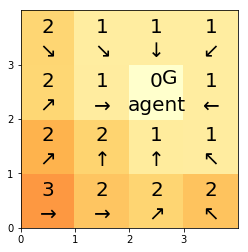

s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 3)　a:↗ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':→
----
s:(0, 3)　a:→ s':(1, 3) a':↑
----
s:(1, 3)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 1)　a:← s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 3)　a:↓ s':(0, 2) a':↗
----
s:(0, 2)　a:↗ s':(0, 2) a':↗
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 3)　a:↓ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 3)　a:↘ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----


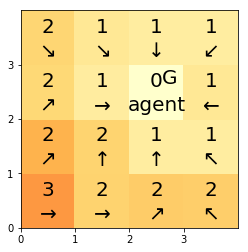

s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:← s':(1, 3) a':↖
----
s:(1, 3)　a:↖ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↘
----
s:(3, 1)　a:↘ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 0)　a:↘ s':(1, 0) a':↘
----
s:(1, 0)　a:↘ s':(1, 0) a':↓
----
s:(1, 0)　a:↓ s':(1, 0) a':↓
----
s:(1, 0)　a:↓ s':(1, 0) a':↖
----
s:(1, 0)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


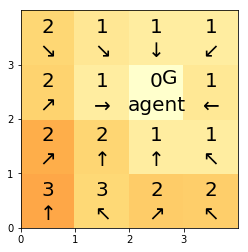

s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 3)　a:↘ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 3)　a:↘ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----


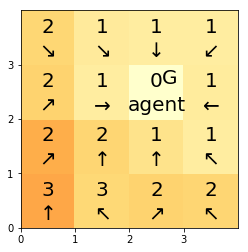

s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(1, 0)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 0)　a:↖ s':(1, 0) a':↖
----
s:(1, 0)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 3)　a:← s':(0, 3) a':↙
----
s:(0, 3)　a:↙ s':(0, 3) a':↘
----
s:(0, 3)　a:↘ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


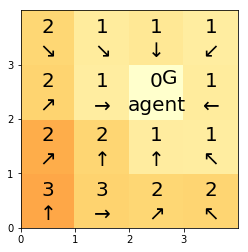

s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↘
----
s:(0, 3)　a:↑ s':(0, 3) a':↘
----
s:(0, 3)　a:↘ s':(1, 2) a':↙
----
s:(1, 2)　a:↙ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 3)　a:↘ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 0)　a:↗ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(3, 1) a':↘
----
s:(3, 1)　a:↘ s':(3, 1) a':→
----
s:(3, 1)　a:→ s':(3, 1) a':→
----
s:(3, 1)　a:→ s':(3, 1) a':↗
----
s:(3, 1)　a:↗ s':(3, 1) a':↗
----
s:(3, 1)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 0) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a

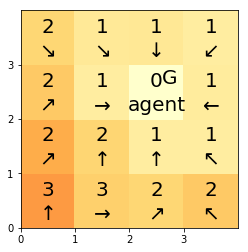

s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(0, 3)　a:↘ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 3)　a:↗ s':(0, 3) a':↘
----
s:(0, 3)　a:↘ s':(1, 2) a':↓
----
s:(1, 2)　a:↓ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(3, 1)　a:↙ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----


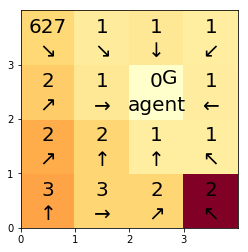

s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 0) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 3)　a:↖ s':(3, 3) a':↙
----
s:(3, 3)　a:↙ s':(2, 2) a':←
----


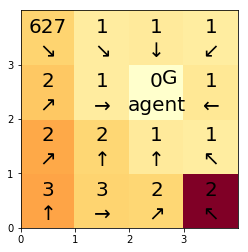

s:(0, 3)　a:↖ s':(0, 3) a':↖
----
s:(0, 3)　a:↖ s':(0, 3) a':→
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(1, 0)　a:↙ s':(1, 0) a':→
----
s:(1, 0)　a:→ s':(2, 0) a':↙
----
s:(2, 0)　a:↙ s':(2, 0) a':↙
----
s:(2, 0)　a:↙ s':(2, 0) a':←
----
s:(2, 0)　a:← s':(1, 0) a':→
----
s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':←
----
s:(3, 1)　a:← s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 3)　a:→ s':(1, 3) a':↙
----
s:(1, 3)　a:↙ s':(0, 2) a':↗
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 0)　a:↘ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


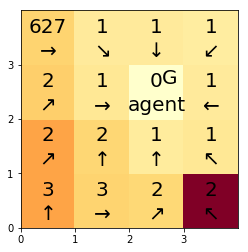

s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 2)　a:↗ s':(1, 3) a':←
----
s:(1, 3)　a:← s':(0, 3) a':↓
----
s:(0, 3)　a:↓ s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 3)　a:↙ s':(0, 3) a':↙
----
s:(0, 3)　a:↙ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':←
----
s:(0, 3)　a:← s':(0, 3) a':←
----
s:(0, 3)　a:← s':(0, 3) a':→
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----


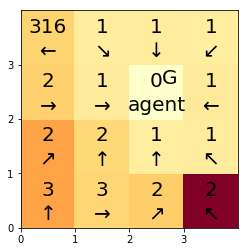

s:(0, 3)　a:↗ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↓
----
s:(0, 3)　a:↓ s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↙
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↘
----
s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↗
----
s:(2, 1)　a:↗ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 3)　a:← s':(0, 3) a':↓
----
s:(0, 3)　a:↓ s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----


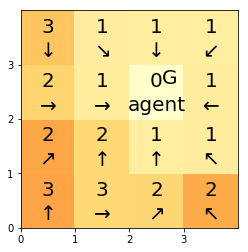

s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 0)　a:↓ s':(3, 0) a':↓
----
s:(3, 0)　a:↓ s':(3, 0) a':↗
----
s:(3, 0)　a:↗ s':(3, 0) a':→
----
s:(3, 0)　a:→ s':(3, 0) a':↖
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(0, 3)　a:↓ s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


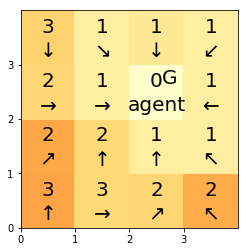

s:(2, 3)　a:↓ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(1, 3) a':↖
----
s:(1, 3)　a:↖ s':(1, 3) a':↓
----
s:(1, 3)　a:↓ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----


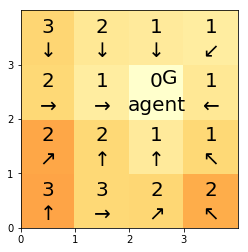

s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↖
----
s:(0, 1)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 2)　a:↓ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


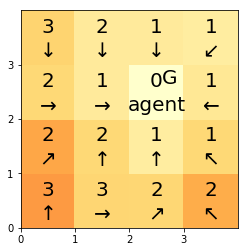

s:(2, 3)　a:↓ s':(2, 2) a':↙
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 3)　a:→ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 2)　a:→ s':(0, 2) a':↓
----
s:(0, 2)　a:↓ s':(0, 2) a':↓
----
s:(0, 2)　a:↓ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 2)　a:↑ s':(0, 3) a':↓
----
s:(0, 3)　a:↓ s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----


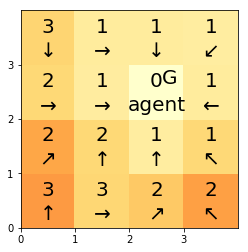

s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 2)　a:↓ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(0, 3)　a:↓ s':(0, 2) a':↖
----
s:(0, 2)　a:↖ s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----


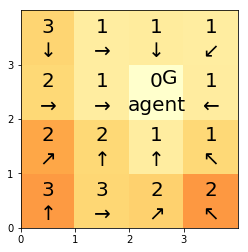

s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↗
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----


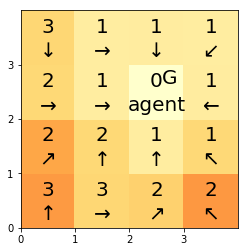

s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(1, 3)　a:→ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':←
----


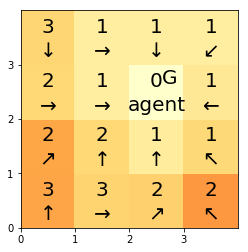

s:(1, 3)　a:↖ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 0)　a:↙ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 3)　a:↗ s':(3, 3) a':↙
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 2)　a:↗ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


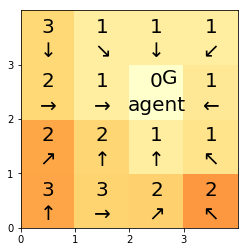

s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↖
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 2)　a:→ s':(1, 2) a':↗
----
s:(1, 2)　a:↗ s':(2, 3) a':↙
----
s:(2, 3)　a:↙ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(1, 3)　a:↙ s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


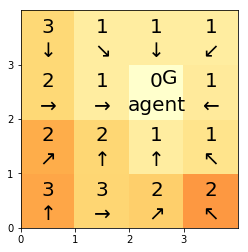

s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↗
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 0)　a:↓ s':(0, 0) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↗
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


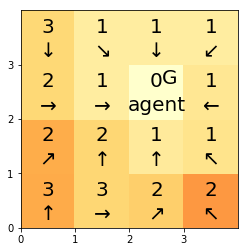

s:(0, 3)　a:↗ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↖
----
s:(0, 3)　a:↖ s':(0, 3) a':↖
----
s:(0, 3)　a:↖ s':(0, 3) a':↙
----
s:(0, 3)　a:↙ s':(0, 3) a':↙
----
s:(0, 3)　a:↙ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':↓
----
s:(0, 3)　a:↓ s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(3, 0) a':↗
----
s:(3, 0)　a:↗ s':(3, 0) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↓
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----


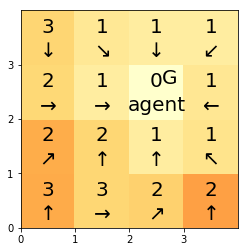

s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':→
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':↙
----
s:(1, 2)　a:↙ s':(0, 1) a':↘
----
s:(0, 1)　a:↘ s':(1, 0) a':→
----
s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


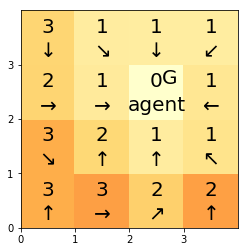

s:(0, 0)　a:↑ s':(0, 1) a':↖
----
s:(0, 1)　a:↖ s':(0, 1) a':↖
----
s:(0, 1)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↗
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 3)　a:↓ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----


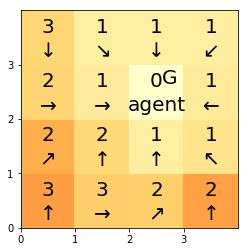

s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(3, 3) a':↙
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(3, 1)　a:← s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':→
----


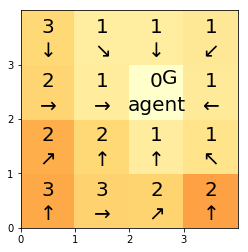

s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(3, 3) a':↙
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 3)　a:↓ s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(1, 2) a':↙
----
s:(1, 2)　a:↙ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↗
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(1, 3)　a:→ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----


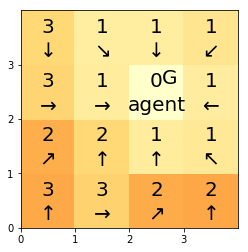

s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 3)　a:↘ s':(3, 3) a':↙
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 3)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↓
----


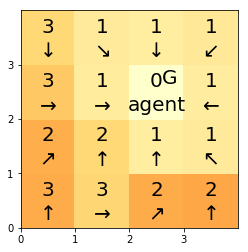

s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':←
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 3)　a:← s':(0, 3) a':↓
----
s:(0, 3)　a:↓ s':(0, 2) a':↗
----
s:(0, 2)　a:↗ s':(0, 2) a':↗
----
s:(0, 2)　a:↗ s':(0, 2) a':↙
----
s:(0, 2)　a:↙ s':(0, 2) a':↙
----
s:(0, 2)　a:↙ s':(0, 2) a':↓
----
s:(0, 2)　a:↓ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 3)　a:↓ s':(0, 2) a':↓
----
s:(0, 2)　a:↓ s':(0, 2) a':↓
----
s:(0, 2)　a:↓ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a

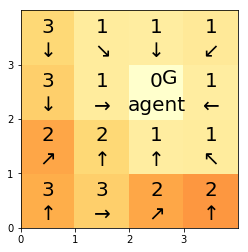

s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 1)　a:← s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':→
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↗
----


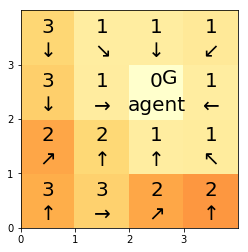

s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 3)　a:↓ s':(0, 2) a':↖
----
s:(0, 2)　a:↖ s':(0, 2) a':↖
----
s:(0, 2)　a:↖ s':(0, 2) a':←
----
s:(0, 2)　a:← s':(0, 2) a':←
----
s:(0, 2)　a:← s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 3)　a:↓ s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 0)　a:↓ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(3, 1) a':↗
----
s:(3, 1)　a:↗ s':(3, 1) a':↓
----
s:(3, 1)　a:↓ s':(3, 0) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':←
----
s:(3, 1)　a:← s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 3)　a:↓ s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----


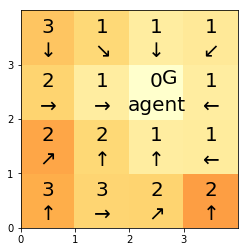

s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 0)　a:↘ s':(3, 0) a':↘
----
s:(3, 0)　a:↘ s':(3, 0) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':←
----
s:(3, 1)　a:← s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 0)　a:← s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':←
----
s:(3, 1)　a:← s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 0)　a:↗ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----


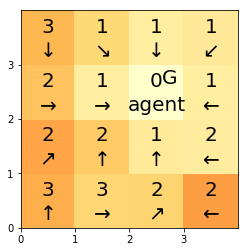

s:(2, 0)　a:↗ s':(3, 1) a':←
----
s:(3, 1)　a:← s':(3, 1) a':←
----
s:(3, 1)　a:← s':(2, 1) a':↘
----
s:(2, 1)　a:↘ s':(3, 0) a':↙
----
s:(3, 0)　a:↙ s':(3, 0) a':↙
----
s:(3, 0)　a:↙ s':(3, 0) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↑
----
s:(3, 1)　a:↑ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 0)　a:← s':(2, 0) a':→
----
s:(2, 0)　a:→ s':(3, 0) a':↑
----
s:(3, 0)　a:↑ s':(3, 0) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↑
----
s:(3, 1)　a:↑ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↙
----
s:(3, 2)　a:↑ s':(3, 3) a':→
----
s:(3, 3)　a:→ s':(3, 3) a':↙
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↑
----
s:(3, 1)　a:↑ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 3)　a

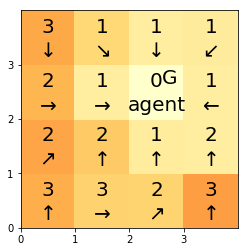

s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↗
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 0)　a:→ s':(2, 0) a':↓
----
s:(2, 0)　a:↓ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↑
----
s:(3, 1)　a:↑ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 3)　a:↓ s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↙
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 0)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


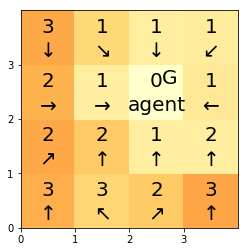

s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↗
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(2, 0)　a:↘ s':(2, 0) a':↘
----
s:(2, 0)　a:↘ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↑
----
s:(3, 1)　a:↑ s':(3, 1) a':↑
----
s:(3, 1)　a:↑ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----


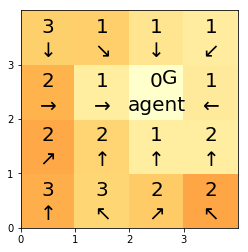

s:(0, 3)　a:↓ s':(0, 3) a':→
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↖
----
s:(3, 2)　a:↙ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↘
----
s:(3, 1)　a:↘ s':(3, 1) a':←
----
s:(3, 1)　a:← s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':↘
----
s:(1, 2)　a:↘ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 1)　a:← s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----


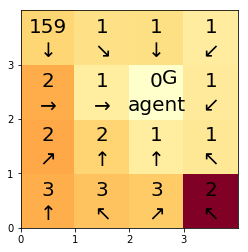

s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 1)　a:← s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 1)　a:→ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 0)　a:↘ s':(3, 0) a':↖
----
s:(3, 0)　a:↖ s':(3, 0) a':↖
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----


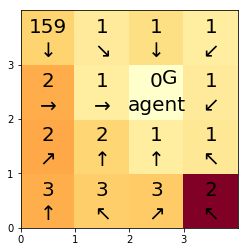

s:(0, 3)　a:↖ s':(0, 3) a':↖
----
s:(0, 3)　a:↖ s':(0, 3) a':↙
----
s:(0, 3)　a:↙ s':(0, 3) a':↙
----
s:(0, 3)　a:↙ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↖
----
s:(0, 3)　a:↖ s':(0, 3) a':↖
----
s:(0, 3)　a:↖ s':(0, 3) a':↙
----
s:(0, 3)　a:↙ s':(0, 3) a':↙
----
s:(0, 3)　a:↙ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↖
----
s:(0, 3)　a:↖ s':(0, 3) a':↖
----
s:(0, 3)　a:↖ s':(0, 3) a':↙
----
s:(0, 3)　a:↙ s':(0, 3) a':↙
----
s:(0, 3)　a:↙ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↖
----
s:(0, 3)　a:↖ s':(0, 3) a':↖
----
s:(0, 3)　a:↖ s':(0, 3) a':↙
----
s:(0, 3)　a:↙ s':(0, 3) a':↙
----
s:(0, 3)　a:↙ s':(0, 3) a':↙
----
s:(0, 3)　a:↙ s':(0, 3) a':↑
----
s:(0, 3)　a

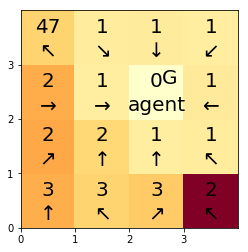

s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↘
----
s:(1, 2)　a:→ s':(2, 2) a':↙
----
s:(0, 0)　a:↑ s':(0, 0) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↗
----
s:(2, 1)　a:↗ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----


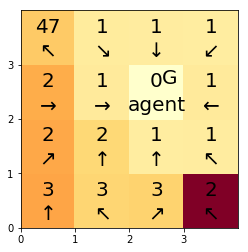

s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(1, 0)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 2)　a:↖ s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 3)　a:↗ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↑
----
s:(0, 3)　a:↑ s':(0, 3) a':↑
----
s:(0, 3)　a

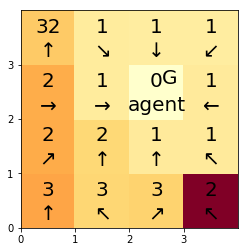

s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↓
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':↙
----
s:(1, 2)　a:↙ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


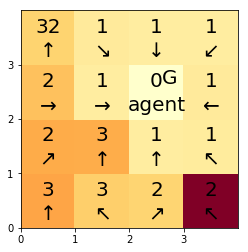

s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 0)　a:↖ s':(0, 1) a':↖
----
s:(0, 1)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 0)　a:← s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----


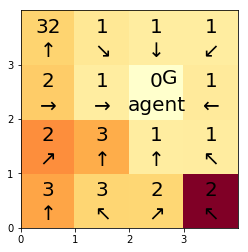

s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↓
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(3, 3) a':↙
----
s:(3, 3)　a:↙ s':(2, 2) a':←
----
s:(0, 1)　a:↗ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 3)　a:↗ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↗
----
s:(0, 3)　a:↗ s':(0, 3) a':↙
----
s:(0, 3)　a:↙ s':(0, 3) a':→
----
s:(0, 3)　a:→ s':(0, 3) a':→
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----


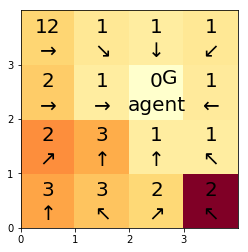

s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 1)　a:↘ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↖
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 3)　a:↑ s':(3, 3) a':↙
----
s:(3, 3)　a:↙ s':(2, 2) a':↘
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 0) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


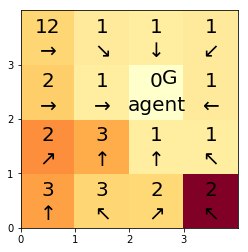

s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 1)　a:→ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


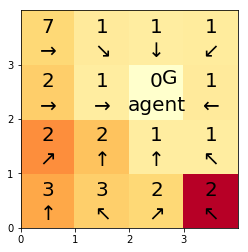

s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----


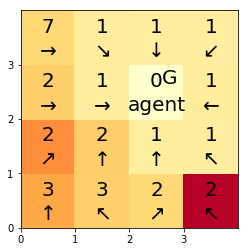

s:(2, 0)　a:↘ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↙
----
s:(3, 1)　a:↙ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↙
----
s:(3, 1)　a:↙ s':(2, 0) a':→
----
s:(2, 0)　a:→ s':(3, 0) a':↖
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↖
----
s:(0, 1)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 1)　a:↓ s':(2, 0) a':→
----
s:(2, 0)　a:→ s':(3, 0) a':↖
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----


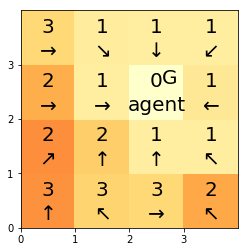

s:(3, 0)　a:↖ s':(3, 0) a':↖
----
s:(3, 0)　a:↖ s':(3, 0) a':↖
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 0)　a:→ s':(2, 0) a':→
----
s:(2, 0)　a:→ s':(3, 0) a':↖
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 2)　a:→ s':(1, 2) a':↘
----
s:(1, 2)　a:↘ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↘
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----


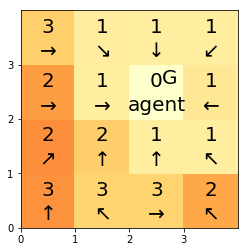

s:(1, 0)　a:← s':(0, 0) a':↙
----
s:(0, 0)　a:↙ s':(0, 0) a':↙
----
s:(0, 0)　a:↙ s':(0, 0) a':↖
----
s:(0, 0)　a:↖ s':(0, 0) a':→
----
s:(0, 0)　a:→ s':(1, 0) a':→
----
s:(1, 0)　a:→ s':(2, 0) a':↓
----
s:(2, 0)　a:↓ s':(2, 0) a':↓
----
s:(2, 0)　a:↓ s':(2, 0) a':↘
----
s:(2, 0)　a:↘ s':(2, 0) a':↘
----
s:(2, 0)　a:↘ s':(2, 0) a':→
----
s:(2, 0)　a:→ s':(3, 0) a':↖
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↗
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


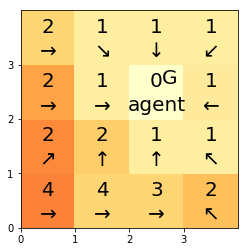

s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 0)　a:↙ s':(1, 0) a':↙
----
s:(1, 0)　a:↙ s':(1, 0) a':↘
----
s:(1, 0)　a:↘ s':(1, 0) a':↘
----
s:(1, 0)　a:↘ s':(1, 0) a':↘
----
s:(1, 0)　a:↘ s':(1, 0) a':↑
----
s:(1, 0)　a:↑ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


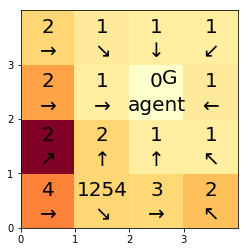

s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↖
----
s:(3, 3)　a:↙ s':(2, 2) a':↖
----
s:(3, 0)　a:↖ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


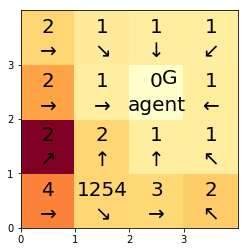

s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(1, 0)　a:↓ s':(1, 0) a':↓
----
s:(1, 0)　a:↓ s':(1, 0) a':↖
----
s:(1, 0)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':↙
----
s:(1, 2)　a:↙ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 2)　a:→ s':(0, 2) a':↘
----
s:(0, 2)　a:↘ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↙
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----


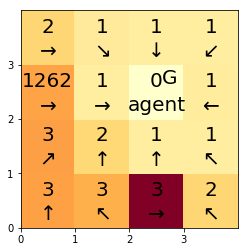

s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 0)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↙
----
s:(1, 0)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----


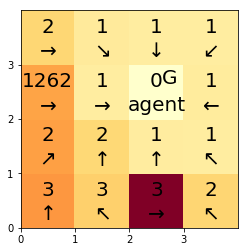

s:(1, 1)　a:↑ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↓
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


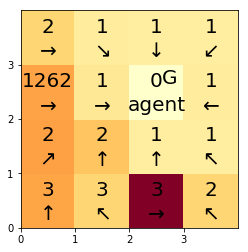

s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':←
----
s:(1, 0)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':←
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 1) a':↙
----
s:(2, 1)　a:↙ s':(1, 0) a':↖
----
s:(1, 0)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':→
----
s:(2, 1)　a:→ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↖
----
s:(0, 1)　a:↗ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


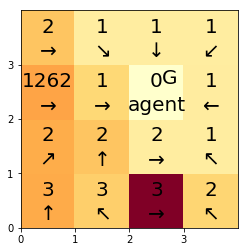

s:(3, 1)　a:↓ s':(3, 0) a':↖
----
s:(3, 0)　a:↖ s':(2, 1) a':→
----
s:(2, 1)　a:→ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':→
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(0, 2)　a:↓ s':(0, 2) a':↓
----
s:(0, 2)　a:↓ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(1, 1)　a:↓ s':(1, 0) a':↖
----
s:(1, 0)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----


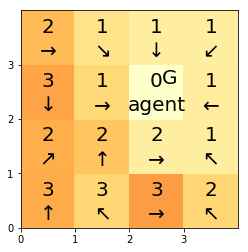

s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 0)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':↙
----
s:(1, 2)　a:↙ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----


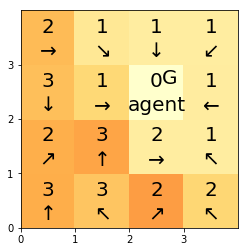

s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 0)　a:↘ s':(1, 0) a':↑
----
s:(1, 0)　a:↑ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(0, 2)　a:↑ s':(0, 3) a':→
----
s:(0, 3)　a:→ s':(0, 3) a':→
----
s:(0, 3)　a:→ s':(0, 3) a':→
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 0)　a:↖ s':(2, 1) a':→
----
s:(2, 1)　a:→ s':(3, 1) a':↓
----
s:(3, 1)　a:↓ s':(3, 0) a':↖
----
s:(3, 0)　a:↖ s':(3, 0) a':↘
----
s:(3, 0)　a:↘ s':(3, 0) a':→
----
s:(3, 0)　a:→ s':(3, 0) a':→
----
s:(3, 0)　a:→ s':(3, 0) a':↓
----
s:(3, 0)　a:↓ s':(3, 0) a':↓
----
s:(3, 0)　a:↓ s':(3, 0) a':↗
----
s:(3, 0)　a:↗ s':(3, 0) a':↗
----
s:(3, 0)　a:↗ s':(3, 0) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a

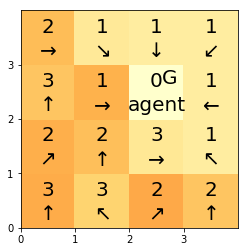

s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↙
----
s:(0, 2)　a:↑ s':(0, 3) a':→
----
s:(0, 3)　a:→ s':(1, 3) a':↖
----
s:(1, 3)　a:↖ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 0)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 1)　a:→ s':(2, 1) a':↗
----
s:(2, 1)　a:↗ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 0)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----


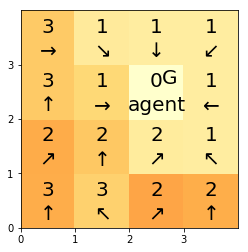

s:(3, 3)　a:→ s':(3, 3) a':↙
----
s:(3, 3)　a:↙ s':(2, 2) a':↘
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 1)　a:↗ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 2)　a:↑ s':(0, 3) a':→
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 3)　a:→ s':(0, 3) a':→
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----


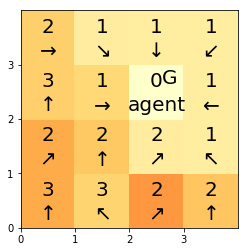

s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 0) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(2, 0)　a:↘ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 2)　a:↖ s':(0, 3) a':→
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 1)　a:← s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----


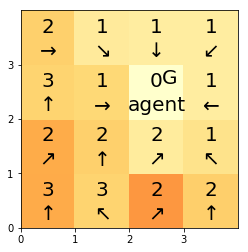

s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 0)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----


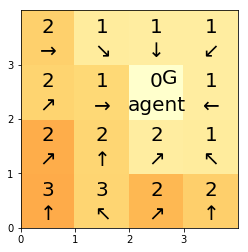

s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↖
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(1, 0)　a:↖ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(2, 2) a':↑
----
s:(1, 0)　a:↖ s':(0, 1) a':→
----
s:(0, 1)　a:→ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':→
----
s:(1, 2)　a:→ s':(1, 2) a':↓
----
s:(1, 2)　a:↓ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----


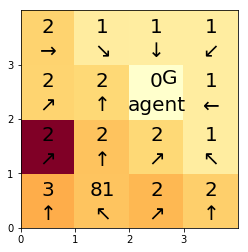

s:(0, 2)　a:↓ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↗
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----


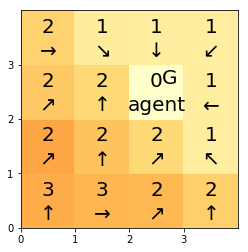

s:(0, 0)　a:↑ s':(0, 0) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↘
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(3, 0)　a:↓ s':(3, 0) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 2)　a:← s':(2, 2) a':↑
----


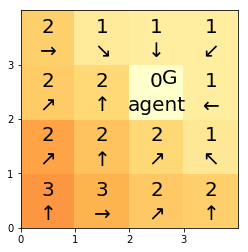

s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 0)　a:→ s':(1, 0) a':→
----
s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(1, 0)　a:↗ s':(2, 1) a':↗
----
s:(2, 1)　a:↗ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(3, 0)　a:↑ s':(3, 0) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':→
----
s:(3, 1)　a:→ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':↘
----
s:(1, 2)　a:↘ s':(2, 1) a':↗
----
s:(2, 1)　a:↗ s':(2, 1) a':↗
----
s:(2, 1)　a:↗ s':(3, 2) a':←
----
s:(3, 2)　a:← s':(3, 2) a':←
----
s:(3, 2)　a:← s':(3, 2) a':↘
----
s:(3, 2)　a:↘ s':(3, 2) a':↘
----
s:(3, 2)　a:↘ s':(3, 2) a':→
----
s:(3, 2)　a

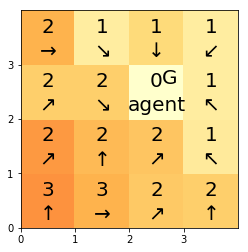

s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':←
----
s:(3, 1)　a:← s':(2, 1) a':↗
----
s:(2, 1)　a:↗ s':(3, 2) a':↓
----
s:(3, 2)　a:↓ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 1)　a:↓ s':(1, 0) a':→
----
s:(1, 0)　a:→ s':(1, 0) a':→
----
s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↘
----
s:(3, 1)　a:↘ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a

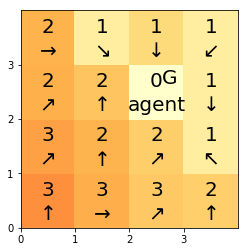

s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(2, 1)　a:↗ s':(3, 2) a':↙
----
s:(3, 2)　a:↙ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 2)　a:↖ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(0, 0)　a:← s':(0, 0) a':←
----
s:(0, 0)　a:← s':(0, 0) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':↗
----
s:(1, 2)　a:↗ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----


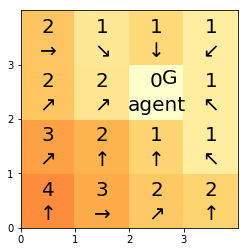

s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(1, 2)　a:↗ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↖
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 0)　a:→ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↘
----
s:(1, 1)　a:↑ s':(1, 2) a':↗
----
s:(1, 2)　a:↗ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----


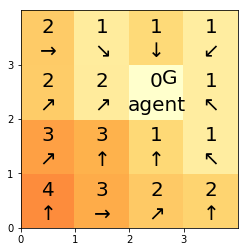

s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':↙
----
s:(1, 2)　a:↙ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':↗
----
s:(1, 2)　a:↗ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':↗
----
s:(1, 2)　a:↗ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 2)　a:↗ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----


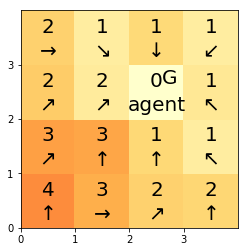

s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':↗
----
s:(1, 2)　a:↗ s':(2, 3) a':↘
----
s:(2, 3)　a:↘ s':(3, 2) a':↓
----
s:(3, 2)　a:↓ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 2)　a:↖ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----


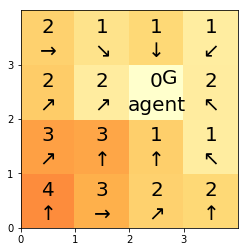

s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↓
----
s:(1, 1)　a:↗ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----


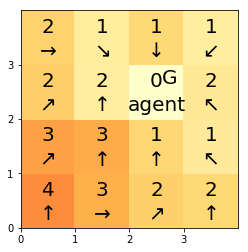

s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↓
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 0)　a:↙ s':(2, 0) a':↙
----
s:(2, 0)　a:↙ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----


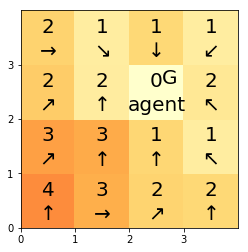

s:(0, 1)　a:↗ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 3)　a:→ s':(1, 3) a':↖
----
s:(1, 3)　a:↖ s':(1, 3) a':↑
----
s:(1, 3)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↗
----
s:(3, 1)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 0)　a:→ s':(2, 0) a':↙
----
s:(2, 0)　a:↙ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(2, 0) a':↗
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----


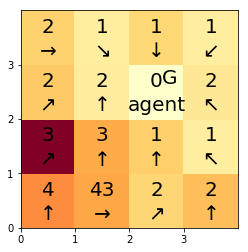

s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(3, 0)　a:↑ s':(3, 0) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↖
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 0)　a:↗ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 0)　a:← s':(1, 0) a':←
----
s:(1, 0)　a:← s':(0, 0) a':↘
----
s:(0, 0)　a:↘ s':(0, 0) a':↘
----
s:(0, 0)　a:↘ s':(0, 0) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↙
----
s:(0, 1)　a:↙ s':(0, 1) a':↙
----
s:(0, 1)　a:↙ s':(0, 1) a':←
----
s:(0, 1)　a:← s':(0, 1) a':←
----
s:(0, 1)　a:← s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':↗
----
s:(1, 2)　a:↗ s':(2, 3) a':↓
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':←
----
s:(1, 2)　a:← s':(0, 2) a':↗
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----


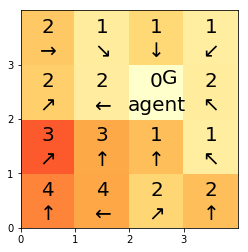

s:(0, 1)　a:↗ s':(1, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 2)　a:↑ s':(1, 3) a':↖
----
s:(1, 3)　a:↖ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(3, 2)　a:↓ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(0, 3)　a:→ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 3)　a:↙ s':(2, 2) a':↑
----
s:(0, 0)　a:↓ s':(0, 0) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↓
----
s:(0, 1)　a:↓ s':(0, 0) a':↖
----
s:(0, 0)　a:↖ s':(0, 0) a':→
----
s:(0, 0)　a:→ s':(1, 0) a':↙
----
s:(1, 0)　a:↙ s':(1, 0) a':↙
----
s:(1, 0)　a:↙ s':(1, 0) a':↓
----
s:(1, 0)　a:↓ s':(1, 0) a':↓
----
s:(1, 0)　a:↓ s':(1, 0) a':←
----
s:(1, 0)　a:← s':(0, 0) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':↘
----
s:(1, 2)　a:↘ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 0)　a:↙ s':(3, 0) a':↑
----
s:(3, 0)　a

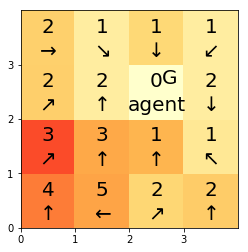

s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 0)　a:← s':(0, 0) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↑
----
s:(0, 1)　a:↑ s':(0, 2) a':↗
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':↗
----
s:(1, 2)　a:↗ s':(1, 2) a':↗
----
s:(1, 2)　a:↗ s':(1, 2) a':↘
----
s:(1, 2)　a:↘ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 1)　a:↑ s':(0, 2) a':↗
----
s:(0, 2)　a:↗ s':(0, 2) a':↗
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':↘
----
s:(1, 2)　a:↘ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':↙
----
s:(1, 2)　a:↙ s':(0, 1) a':↓
----
s:(0, 1)　a:↓ s':(0, 0) a':↑
----
s:(0, 0)　a:↑ s':(0, 0) a':←
----
s:(0, 0)　a:← s':(0, 0) a':↙
----
s:(0, 0)　a:↙ s':(0, 0) a':↙
----
s:(0, 0)　a:↙ s':(0, 0) a':↘
----
s:(0, 0)　a

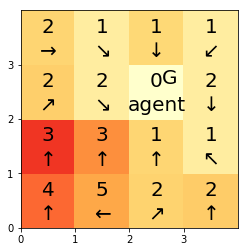

s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(2, 3)　a:↓ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↑
----
s:(0, 1)　a:↑ s':(0, 2) a':↗
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(1, 2)　a:↘ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(2, 1)　a:← s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':↘
----
s:(1, 2)　a:↘ s':(1, 2) a':↘
----
s:(1, 2)　a:↘ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↑
----
s:(0, 1)　a:↑ s':(0, 2) a':↗
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↖
----
s:(1, 0)　a:↙ s':(1, 0) a':↙
----
s:(1, 0)　a:↙ s':(1, 0) a':←
----
s:(1, 0)　a:← s':(0, 0) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↑
----
s:(0, 1)　a:↑ s':(0, 2) a':↗
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----


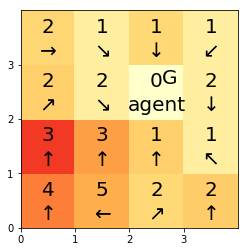

s:(3, 2)　a:← s':(3, 2) a':←
----
s:(3, 2)　a:← s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↖
----
s:(0, 1)　a:↖ s':(0, 1) a':↑
----
s:(0, 1)　a:↑ s':(0, 1) a':↑
----
s:(0, 1)　a:↑ s':(0, 2) a':↗
----
s:(0, 2)　a:↗ s':(1, 3) a':↘
----
s:(1, 3)　a:↘ s':(2, 2) a':↑
----
s:(0, 0)　a:↑ s':(0, 1) a':↑
----
s:(0, 1)　a:↑ s':(0, 2) a':→
----
s:(0, 2)　a:→ s':(1, 2) a':↓
----
s:(1, 2)　a:↓ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 1) a':↑
----
s:(1, 1)　a:↑ s':(1, 2) a':↘
----
s:(1, 2)　a:↘ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 1)　a:↗ s':(1, 2) a':↘
----
s:(1, 2)　a:↘ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(0, 2)　a:↓ s':(0, 1) a':↗
----
s:(0, 1)　a:↗ s':(1, 2) a':↘
----
s:(1, 2)　a:↘ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↑
----
s:(3, 0)　a:↑ s':(3, 1) a':↖
----
s:(3, 1)　a:↖ s':(2, 2) a':↑
----
s:(1, 2)　a:↘ s':(2, 1) a':↑
----
s:(2, 1)　a:↑ s':(2, 2) a':↗
----


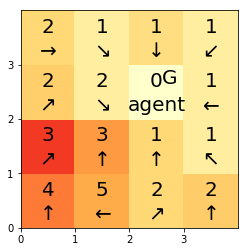

In [15]:
agent = Agent()
for i in range(1000):
    one_trial()
    if(not i % 10):
        draw("all")
draw("all")